# Hw2 (julia set)

Mirpulatov Islombek

PHD-1, CDSE

In [22]:
import os
import imageio
import numpy as np
import matplotlib.pyplot as plt

## 1. Make a two color plot, e.g black – the value of z converges, white – diverges (1 point)

In [2]:
def julia_set(Z, C):
    return Z ** 2 + C

In [3]:
def plot_julia_set_black_white(shape, points, max_iterations, C):
    X = np.linspace(-shape, shape, points)
    Y = np.linspace(-shape, shape, points)
    
    results = np.zeros((points, points), dtype=np.uint8)

    for i in range(points):
        for j in range(points):
            z = complex(X[i], Y[j])
            for k in range(max_iterations):
                z = julia_set(z, C)
                if abs(z) > 2:
                        results[i][j] = 0
                        break
                results[i][j] = max_iterations

    plt.figure(figsize=(8, 8))
    plt.ylabel('Re(z0)', fontsize=18)
    plt.xlabel('Im(z0)', fontsize=18)
    plt.imshow(results, cmap='Greys')

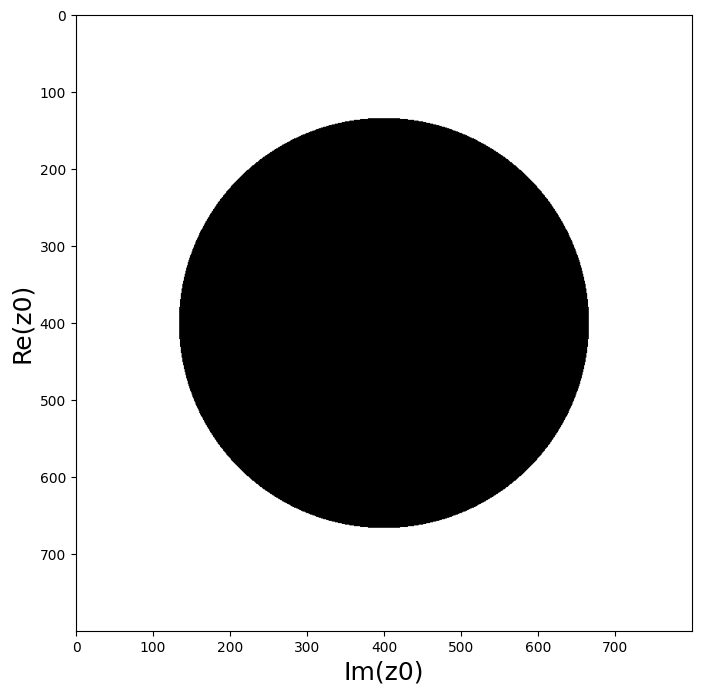

In [4]:
plot_julia_set_black_white(shape=1.5, points=800, max_iterations=255, C=0)

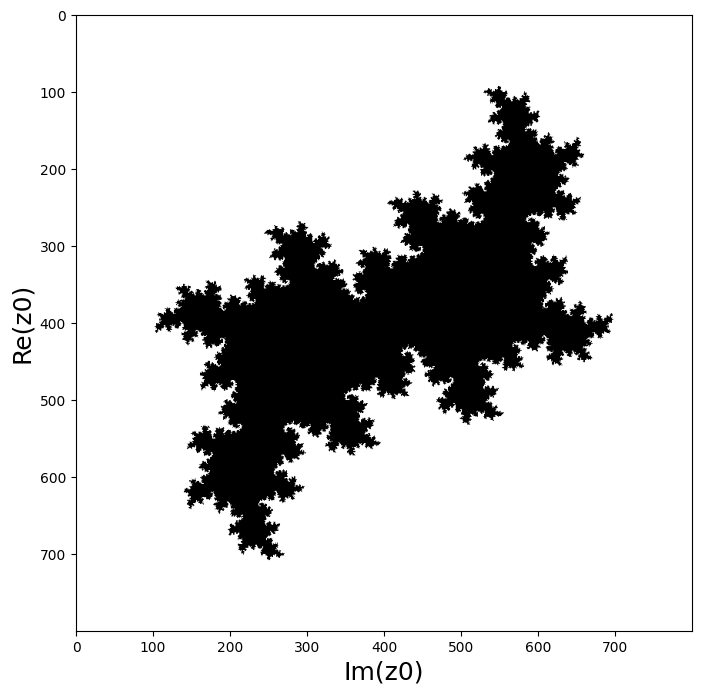

In [5]:
plot_julia_set_black_white(shape=1.5, points=800, max_iterations=255, C=complex(.1, .6))

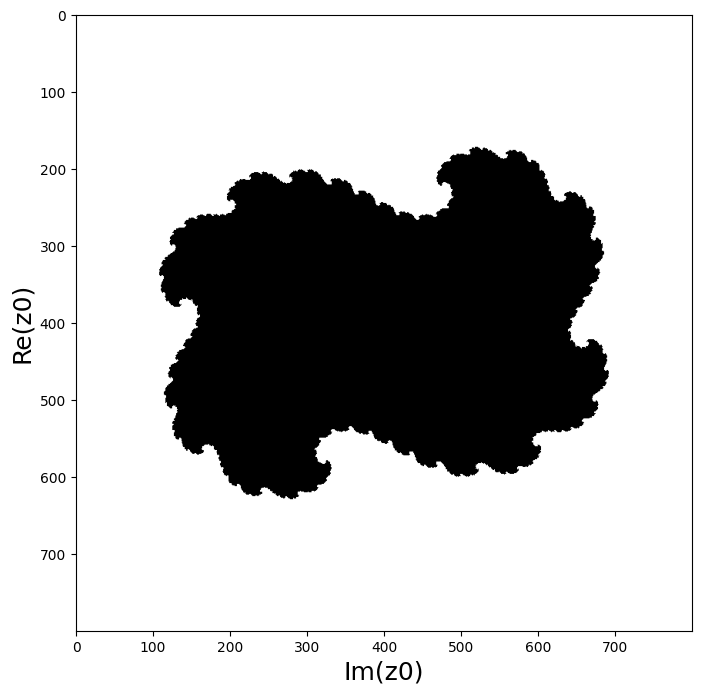

In [6]:
plot_julia_set_black_white(shape=1.5, points=800, max_iterations=255, C=complex(.3, .1))

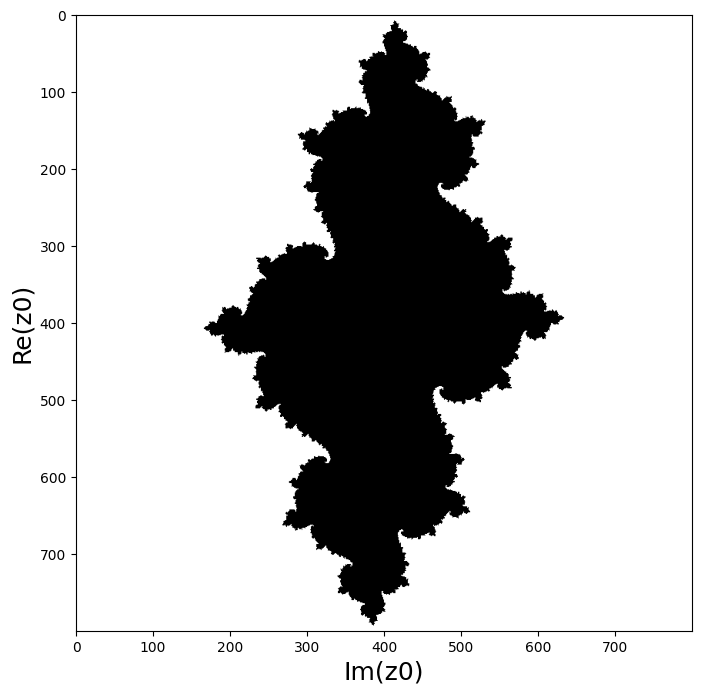

In [7]:
plot_julia_set_black_white(shape=1.5, points=800, max_iterations=255, C=complex(-0.7, 0.1))

## 2. Use more than two colors for bifurcation points (you can also create your own coloring logic or look for proposals on the internet or use the one provided in the step-by-step guide) (1 point)

In [18]:
def plot_julia_set(shape, points, max_iterations, C):
    X = np.linspace(-shape, shape, points)
    Y = np.linspace(-shape, shape, points)
    
    results = np.zeros((points, points), dtype=np.uint8)

    for i in range(points):
        for j in range(points):
            z = complex(X[i], Y[j])
            for k in range(max_iterations):
                z = julia_set(z, C)
                if abs(z) > 2:
                        results[i][j] = k
                        break
                results[i][j] = max_iterations

    plt.figure(figsize=(10, 10))
    plt.ylabel('Re(z0)', fontsize=18)
    plt.xlabel('Im(z0)', fontsize=18)
    plt.imshow(results, extent=(-shape, shape, -shape, shape), origin='lower', cmap='flag')

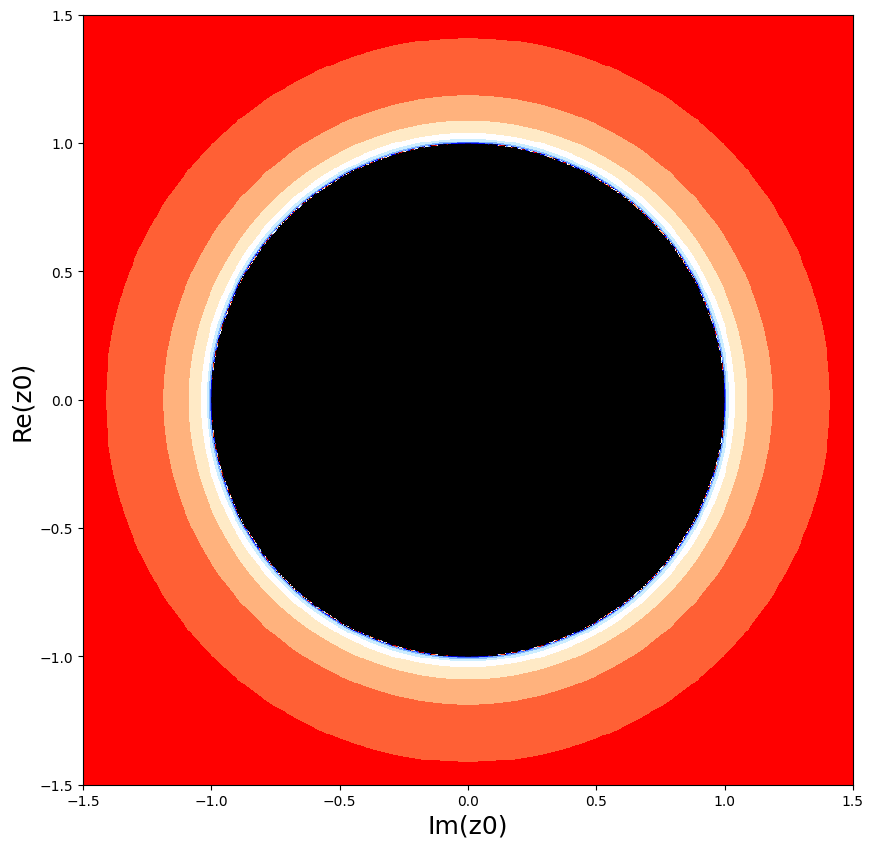

In [12]:
plot_julia_set(shape=1.5, points=800, max_iterations=255, C=0)

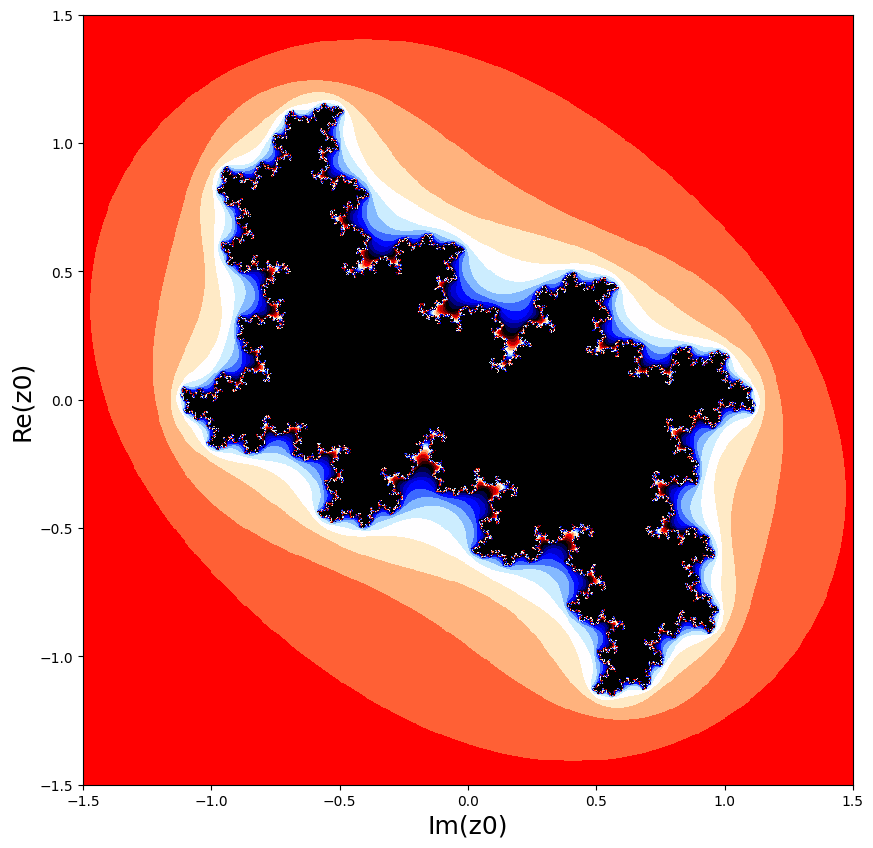

In [13]:
plot_julia_set(shape=1.5, points=800, max_iterations=255, C=complex(.1, .6))

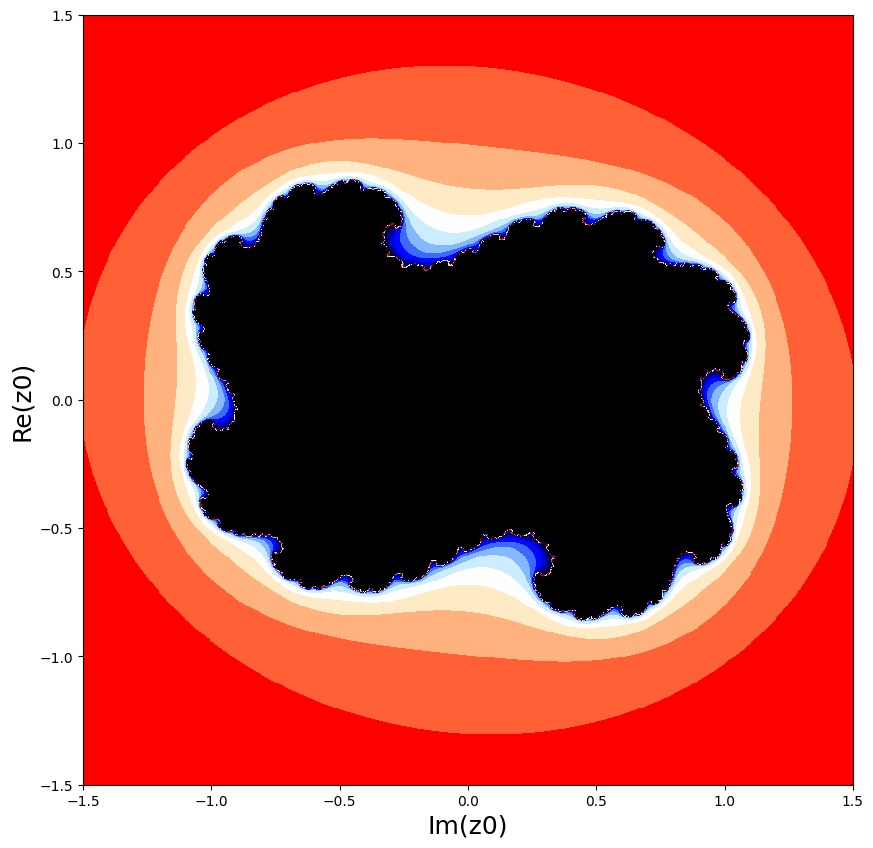

In [14]:
plot_julia_set(shape=1.5, points=800, max_iterations=255, C=complex(.3, .1))

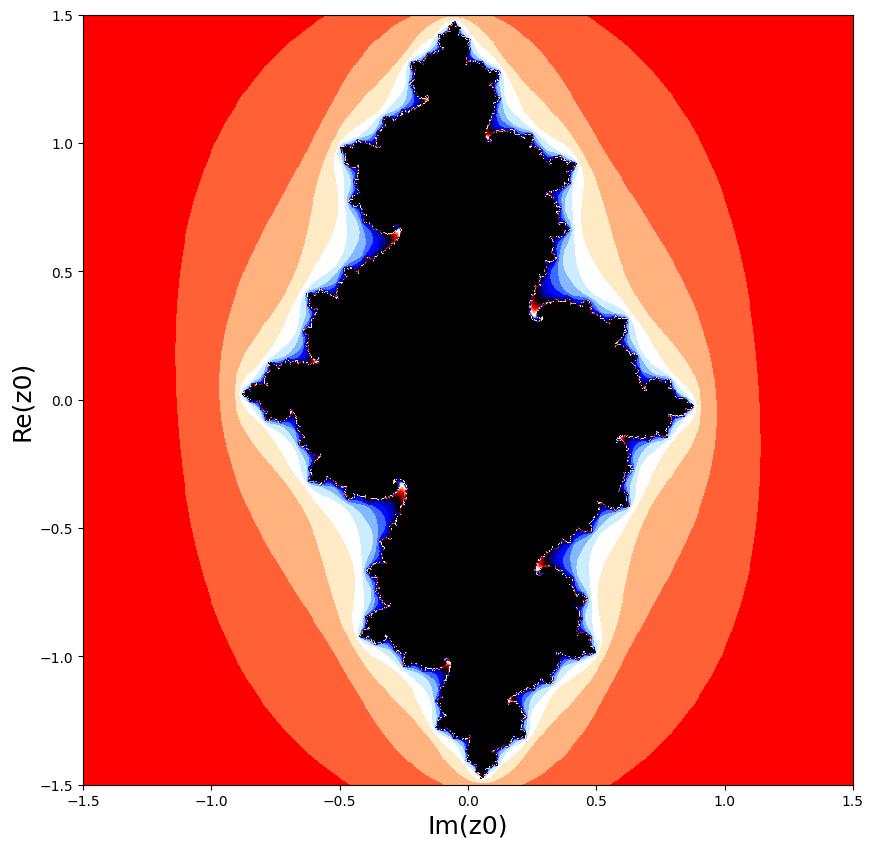

In [15]:
plot_julia_set(shape=1.5, points=800, max_iterations=255, C=complex(-0.7, 0.1))

## 3. Generate figure of Julia set (c = 1-r) where r is the golden ratio. Label the axes Re(z0) and Im(z0) (2 points)

In [16]:
r = (1 + np.sqrt(5)) / 2
c = complex(1 - r, 0)

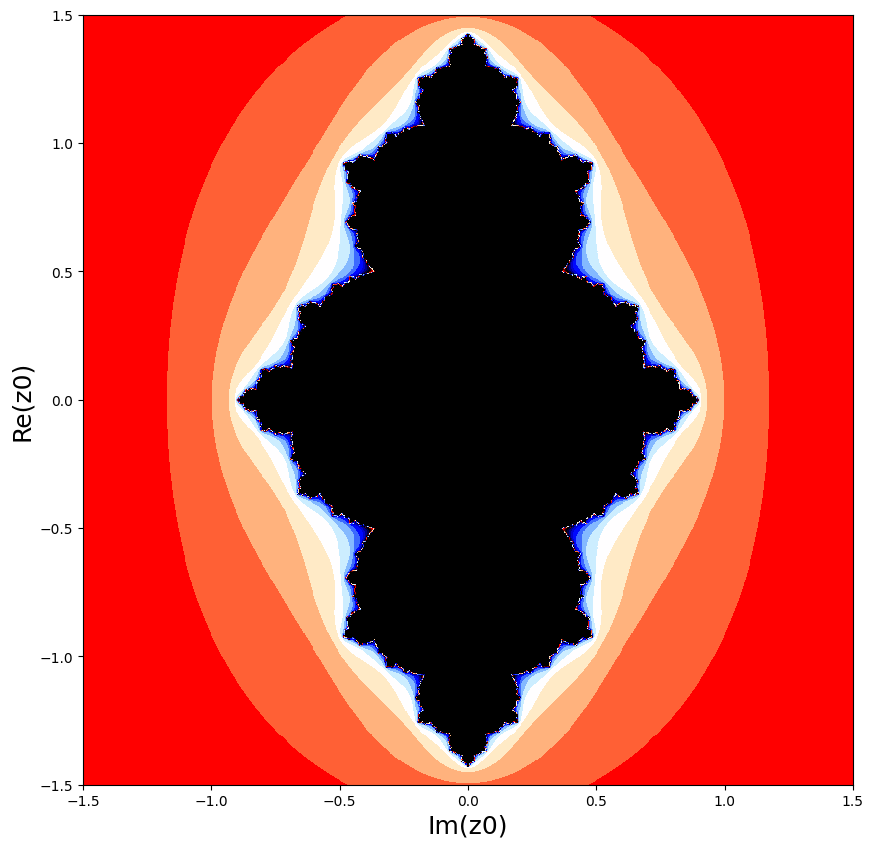

In [17]:
plot_julia_set(shape=1.5, points=800, max_iterations=255, C=c)

## 4. Plot the figures for c=exp(ia), a = range(0,2pi) and write down the axes like in subtask 3, create animation of these figures slowly changing the value of a (3 points)

In [ ]:
def plot_julia_set(shape, points, max_iterations, C, inc=0):
    X = np.linspace(-shape, shape, points)
    Y = np.linspace(-shape, shape, points)
    
    results = np.zeros((points, points), dtype=np.uint8)

    for i in range(points):
        for j in range(points):
            z = complex(X[i], Y[j])
            for k in range(max_iterations):
                z = julia_set(z, C)
                if abs(z) > 2:
                        results[i][j] = k
                        break
                results[i][j] = max_iterations

    plt.figure(figsize=(10, 10))
    plt.ylabel('Re(z0)', fontsize=18)
    plt.xlabel('Im(z0)', fontsize=18)
    plt.imshow(results, extent=(-shape, shape, -shape, shape), origin='lower', cmap='flag')
    plt.savefig(f'julia_set/{str(inc).zfill(5)}.png', dpi=300)

In [19]:
a = np.linspace(0, 2 * np.pi, 300)
c = np.cos(a) + 1j * np.sin(a)

In [ ]:
for count, i in enumerate(c):
    plot_julia_set(shape=1.5, points=800, max_iterations=150, C=i, inc=count)

In [ ]:
image_directory = 'julia_set/'

png_files = [f for f in os.listdir(image_directory) if f.endswith('.png')]
png_files.sort()

image_paths = [os.path.join(image_directory, file) for file in png_files]
images = []

for image_path in image_paths:
    images.append(imageio.imread(image_path))

imageio.mimsave('julia_set.gif', images, duration=0.3)